<a href="https://colab.research.google.com/github/matheus-ramos-medeiros/ProjetoUnicornios/blob/main/Projeto_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Unicórnio**

"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

O nome "unicórnio" faz alusão à raridade dessas empresas, assim como a criatura mítica que é difícil de encontrar.

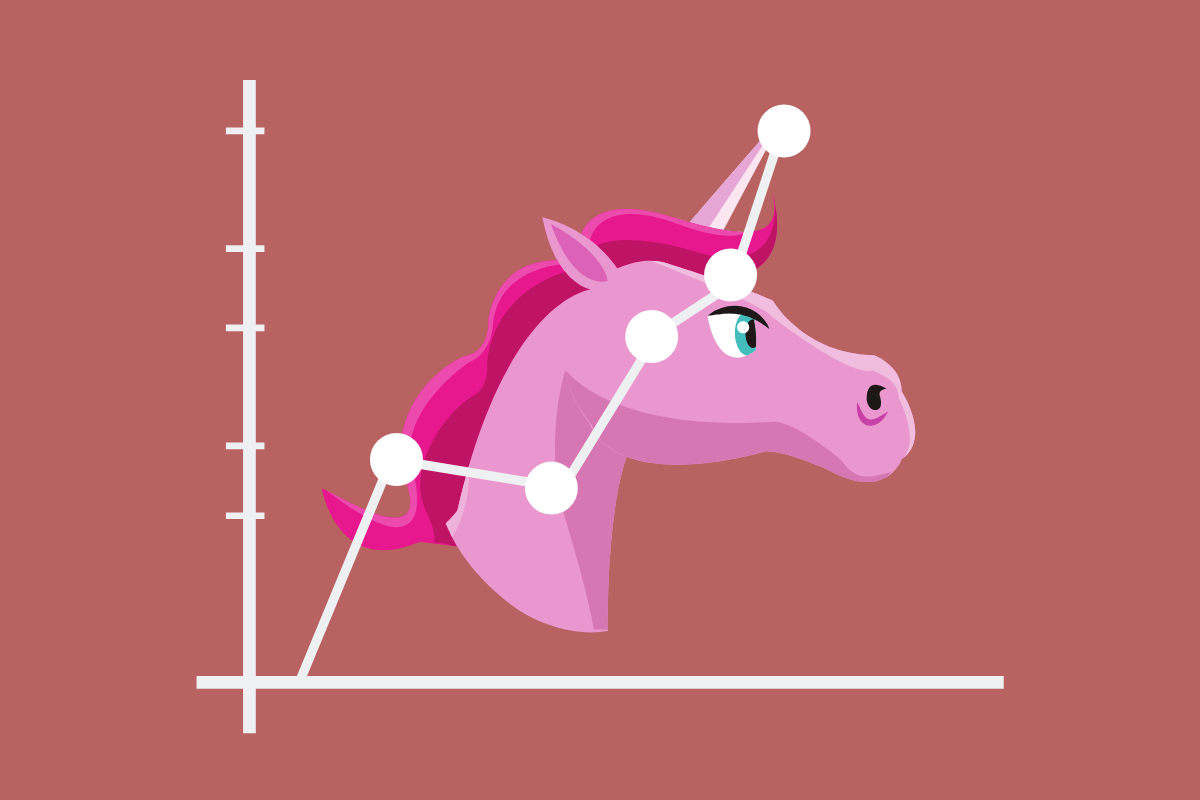

# **Sobre o conjunto de dados** <p>

O conjunto de dados esta na plataforma Kaggle, é uma plataforma para cientistas de dados, engenheiros de aprendizado de máquina e outros profissionais competirem em desafios de ciência de dados, colaborarem em projetos de dados e desenvolverem habilidades em análise de dados e aprendizado de máquina.

O Kaggle hospeda uma ampla gama de competições de ciência de dados, desde a previsão de preços de ações até o reconhecimento de imagens, e fornece aos participantes conjuntos de dados, ferramentas e recursos para ajudá-los a construir e testar seus modelos. As competições são avaliadas com base na precisão e rapidez das previsões dos participantes.

Além das competições, o Kaggle também hospeda conjuntos de dados para uso público, oferece cursos e tutoriais em ciência de dados e aprendizado de máquina e fornece uma comunidade para cientistas de dados compartilharem conhecimento e colaborarem em projetos.

Vamos analisar os unicórnios gerados de 2007 até 2021.


[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)


## Levantando das hipóteses


*   Qual setor é o predominante?
*   ual ano foi predominante?
*   Qual país tem mais empresas?
*   O Brasil é expressivo dentros dos paises que geram unicórnios?


In [1]:
# Importando os Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Retiando os avisos do Colab
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Acessando o meu drive
from  google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Lendo o arquivo
Base = pd.read_csv('/content/drive/MyDrive/Startups+in+2021+end.csv')

# Verificando Dimensões
print('A base de dados tem',Base.shape[0],'linhas e',Base.shape[1],'linhas.')

A base de dados tem 936 linhas e 8 linhas.


In [4]:
# Primeiros registros
Base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
# Ultimos Registros
Base.tail()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"
935,935,Pet Circle,$1,12/7/2021,Australia,Alexandria,E-commerce & direct-to-consumer,"Prysm Capital, Baillie Gifford & Co., TDM Grow..."


In [6]:
# Colunas
Base.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [7]:
# Renomear
Base.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True )

In [8]:
# Verificando os tipos das colunas
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


Verificamos que as colunas 'Valor ($)' e 'Data de Adesão' estão como tipo de texto.

Então pra qualquer análise não funcionará, então temos que mudar os tipos dessas colunas.

In [9]:
# Alterando o tipo da coluna Valor para Float
Base['Valor ($)'] = pd.to_numeric(Base['Valor ($)'].apply(lambda x : x.replace('$','')))

# Alterando o tipo da coluna Data de Adesão para Date
Base['Data de Adesão'] = pd.to_datetime(Base['Data de Adesão'])

In [10]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor ($)       936 non-null    float64       
 3   Data de Adesão  936 non-null    datetime64[ns]
 4   Pais            936 non-null    object        
 5   Cidade          921 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    935 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 58.6+ KB


Agora consetando os tipos das colunas podemos fazer uma anlise melhor com as datas e valores.

In [11]:
#Colocando o Mês e o Ano na Base
Base['Mes'] = pd.DatetimeIndex(Base['Data de Adesão']).month
Base['Ano'] = pd.DatetimeIndex(Base['Data de Adesão']).year
Base

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ...",12,2021
932,932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation...",12,2021
933,933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S...",12,2021
934,934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures",12,2021


## Valores Ausentes

In [12]:
#Verificando valores ausentes
Ausentes = Base.isnull().sum().sort_values(ascending=False)
Ausentes

Cidade            15
Investidores       1
Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Setor              0
Mes                0
Ano                0
dtype: int64

In [13]:
#Valores ausentes em %
Ausentes = (Base.isnull().sum()/Base.shape[0]*100)
Ausentes.sort_values(ascending=False)

Cidade            1.602564
Investidores      0.106838
Id                0.000000
Empresa           0.000000
Valor ($)         0.000000
Data de Adesão    0.000000
Pais              0.000000
Setor             0.000000
Mes               0.000000
Ano               0.000000
dtype: float64

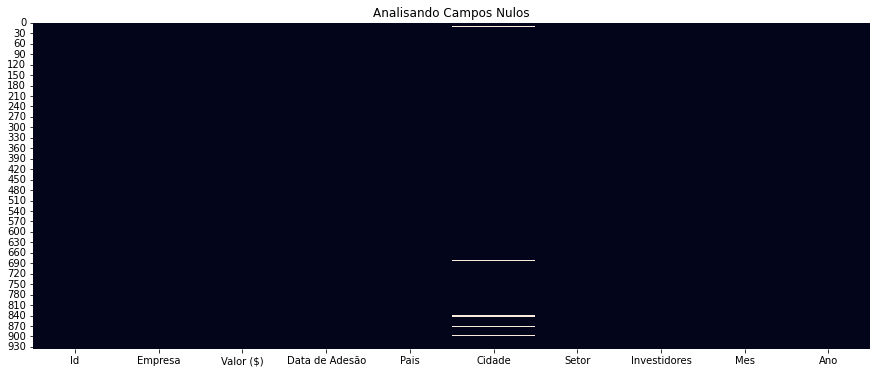

In [14]:
# Valores ausentes graficamente
plt.figure( figsize=(15,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base.isnull(), cbar=False );

# Analisando os Setores

In [15]:
#Verificando dados únicos
Base['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [16]:
#Verificando quantidade de Setor
Base['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

Podemos ver que temos alguns setores que estão escritos de maneira errada como:

*   'Artificial Intelligence'
*   'Finttech'

Vamos aplicar a função lambda para tratar a base.


In [17]:
# Acertando as nomenclaturas

Base['Setor'] = Base['Setor'].apply(lambda x : x.replace('Artificial Intelligence','Artificial intelligence'))
Base['Setor'] = Base['Setor'].apply(lambda x : x.replace('Finttech','Fintech'))


In [18]:
#Verificando novamente a quantidade de Setor
Base['Setor'].value_counts()

Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 73
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: Setor, dtype: int64

In [19]:
# Valores Unicos - Rank %
Base['Setor'].value_counts( normalize=True )*100

Fintech                                20.405983
Internet software & services           17.841880
E-commerce & direct-to-consumer        10.897436
Artificial intelligence                 7.799145
Health                                  6.730769
Other                                   5.448718
Supply chain, logistics, & delivery     5.448718
Cybersecurity                           4.380342
Mobile & telecommunications             3.952991
Data management & analytics             3.846154
Hardware                                3.418803
Auto & transportation                   3.098291
Edtech                                  2.884615
Consumer & retail                       2.457265
Travel                                  1.388889
Name: Setor, dtype: float64

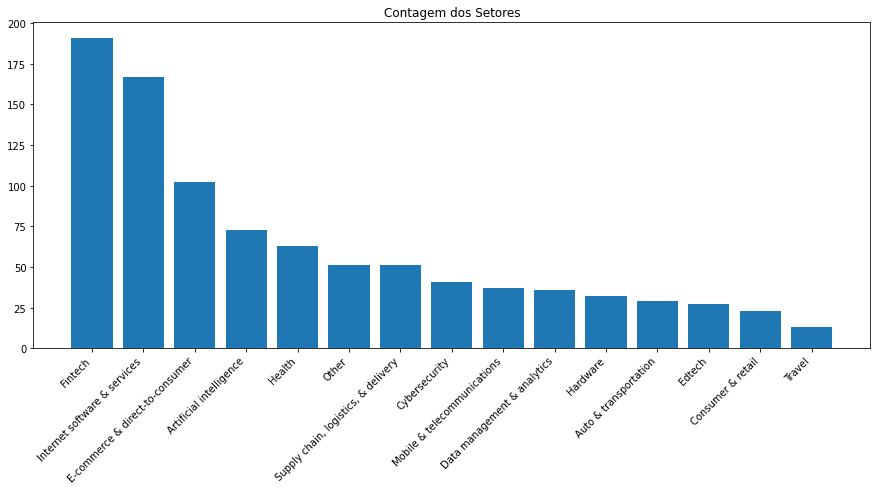

In [20]:
# Plotando a contagem dos setores
plt.figure( figsize=(15,6) )
plt.title('Contagem dos Setores')
plt.bar( Base['Setor'].value_counts().index, 
        Base['Setor'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

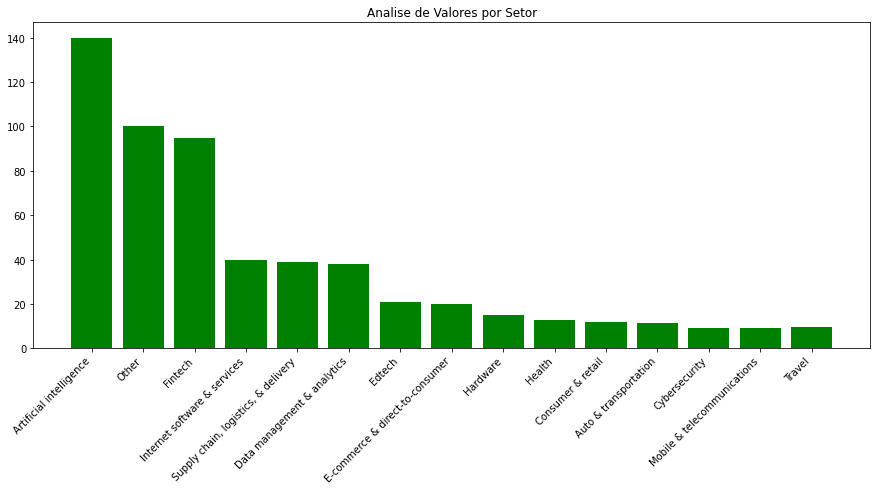

In [21]:
# Plotando o valor por setor
plt.figure( figsize=(15,6) )
plt.title('Analise de Valores por Setor')
plt.bar(Base['Setor'],
      Base['Valor ($)'], 
      color = 'green' )
plt.xticks( rotation=45, ha='right' );

Analisando os dados é interessante, pois o setor 'Fintech' é de maior quantidade de empresas, mas não o de valor.

Sendo o terceiro em questão de valor.

Olhando para o setor de Inteligência Artificial são poucas empresas constuídas mas são as mais valiosas.

# Analisando os País

Agora vamos analisar os paises que geram essas empresas.

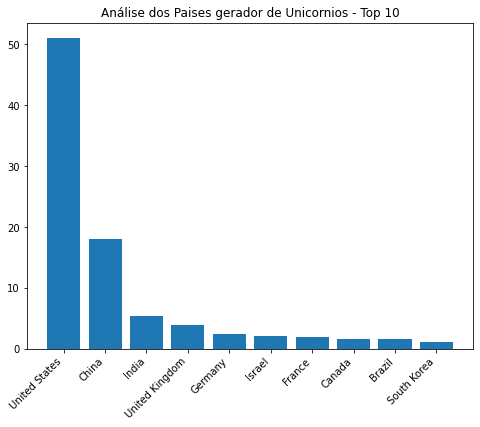

In [32]:
Analise = round( Base['Pais'].value_counts( normalize=True ) * 100, 1 )
# Plot top 10 
plt.figure( figsize=(8,6) )
plt.title('Análise dos Paises gerador de Unicornios - Top 10')
plt.bar(
    Analise.index[0:10],
    Analise.head(10)
)
plt.xticks( rotation=45, ha='right' );

Verificamos que o 'United States' é o pais com maior quantidade de unicórnios 

Agora vamos que olhar em questão de valor.

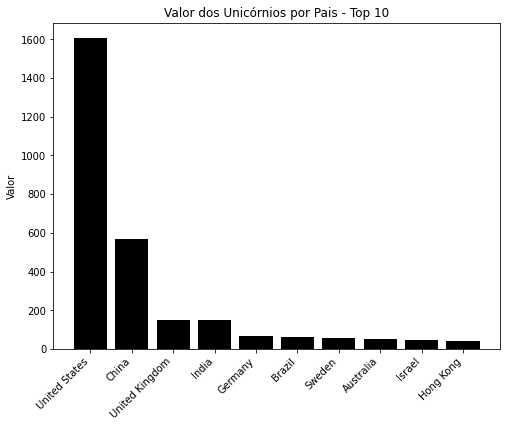

In [34]:
#grafico Top 10 Paises valores
Valor = Base['Valor ($)'].groupby(by = Base['Pais']).sum().sort_values(ascending=False)[:10]
Valor = pd.DataFrame(Valor)
Valor = Valor.reset_index()
plt.figure( figsize=(8,6) )
plt.title('Valor dos Unicórnios por Pais - Top 10')
plt.bar(
    Valor['Pais'],
    Valor['Valor ($)'],
    color = 'black'
)
plt.ylabel('Valor')
plt.xticks( rotation=45, ha='right' );

Não temos muita diferença como podemos olhar nos dois gráficos dos 5 primeiros paises.

Mas se olharmos o Brasil, chama atenção pois está entre os Top 10, em questão de quantidade e valor.

# Análise Cidade

In [24]:
# Tabela analitica Cidades
Base['Cidade'].value_counts(ascending = False)[:10]

San Francisco    134
New York          81
Beijing           62
Shanghai          45
London            28
Bengaluru         25
Shenzhen          18
Berlin            16
Paris             15
Chicago           14
Name: Cidade, dtype: int64

In [30]:
# Vamos ver dentro do Estados Unidos
Base_USA = Base.loc[Base['Pais']=="United States"]
Base_USA['Cidade'].value_counts(ascending = False)[:10]


San Francisco    134
New York          80
Chicago           14
Boston            14
Mountain View     13
Palo Alto         11
Redwood City      10
Sunnyvale          8
Los Angeles        8
San Mateo          8
Name: Cidade, dtype: int64

# Análise Brasil

Vamos analisar o país Brasil, vamos filtrar ele nos dados para saber algumas infomações de quantos unicornios foram gerados, quantidade, setor e qual ano foi mais expressivo.


In [35]:
#vamos filtrar o brasil na base
Base_Brasil = Base.loc[Base['Pais'] == 'Brazil'].reset_index()
Base_Brasil = Base_Brasil.drop(columns= ['Id','index'])
Base_Brasil

,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,Nubank,30.00,2018-03-01,Brazil,Sao Paulo,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V...",3,2018
1,QuintoAndar,5.10,2019-09-09,Brazil,Campinas,E-commerce & direct-to-consumer,"Kaszek Ventures, General Atlantic, SoftBank Group",9,2019
2,C6 Bank,5.05,2020-12-02,Brazil,Sao Paulo,Fintech,Credit Suisse,12,2020
3,Nuvemshop,3.10,2021-08-17,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Kaszek Ventures, Qualcomm Ventures, Accel",8,2021
4,Wildlife Studios,3.00,2019-12-05,Brazil,Sao Paulo,Other,"Benchmark, Bessemer Venture Partners",12,2019
5,Loft,2.90,2020-01-03,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Monashees+, Andreessen Horowitz, QED Investors",1,2020
6,1,2.15,2021-09-08,Brazil,Sao Paulo,Fintech,"Plug and Play Ventures, Valor Capital Group, D...",9,2021
7,Loggi,2.00,2019-06-05,Brazil,Sao Paulo,"Supply chain, logistics, & delivery","Qualcomm Ventures, SoftBank Group. Monashees+",6,2019
8,Creditas,1.75,2020-12-18,Brazil,Sao Paulo,Fintech,"Kaszek Ventures, Amadeus Capital Partners, Quo...",12,2020
9,Movile,1.00,2018-07-12,Brazil,Sao Paulo,Mobile & telecommunications,"Innova Capital - FIP, 3G Capital Management, P...",7,2018


In [36]:
print('Temos',Base_Brasil.shape[0],'unicórnios originados no Brasil.')

Temos 15 unicórnios originados no Brasil.


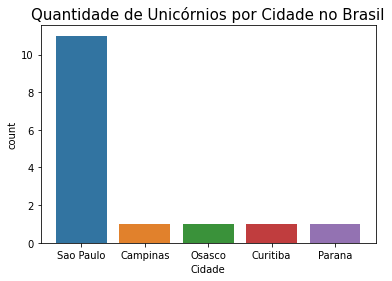

In [37]:
#Verificando qual cidade do Brasil teve maior ocorrencia

sns.countplot(data=Base_Brasil,
              x =Base_Brasil['Cidade'] 
              )
sns.distplot().set_title(
  'Quantidade de Unicórnios por Cidade no Brasil', fontdict = { 'fontsize': 15});



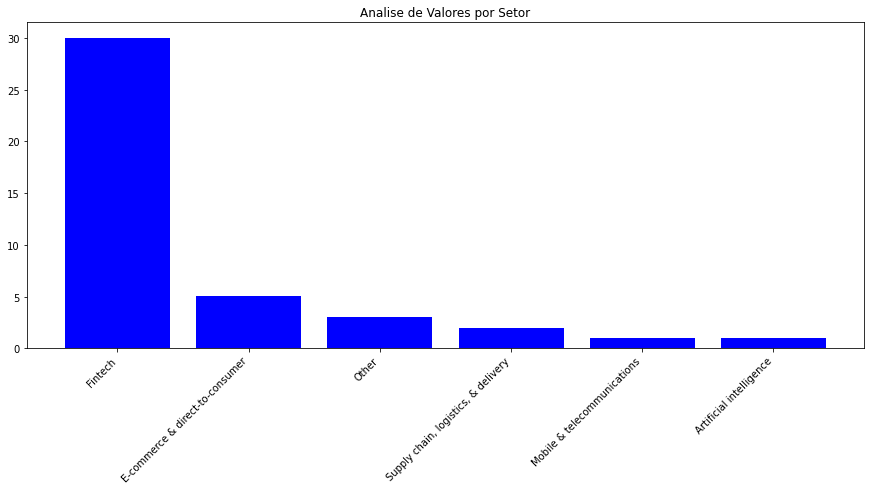

In [38]:
# grafico sobre os setores no Brasil
plt.figure( figsize=(15,6) )
plt.title('Analise de Valores por Setor')
plt.bar(Base_Brasil['Setor'],
      Base_Brasil['Valor ($)'], 
      color = 'blue' )
plt.xticks( rotation=45, ha='right' );

# Análise Ano

Vamos fazer algumas analises de series temporais.


In [39]:
#Ano - Tabela Analitica
Analise_Ano = Base.groupby( by=['Ano','Empresa','Valor ($)'] ).count()['Id'].reset_index()
Quantidade_Ano = Analise_Ano['Empresa'].groupby(Analise_Ano['Ano']).count().reset_index()
Valor_Ano = Analise_Ano['Valor ($)'].groupby(Analise_Ano['Ano']).sum().reset_index()
Analise_Ano = Quantidade_Ano.merge(Valor_Ano, how ='inner' )
Analise_Ano.rename(columns = {'Empresa':'Quantidade'},inplace = True)
Analise_Ano

,Ano,Quantidade,Valor ($)
0,2007,1,1.38
1,2010,1,3.00
2,2011,2,51.30
3,2012,4,122.30
4,2013,3,4.30
5,2014,13,165.38
6,2015,37,99.55
7,2016,22,81.04
8,2017,46,296.14
9,2018,107,495.47


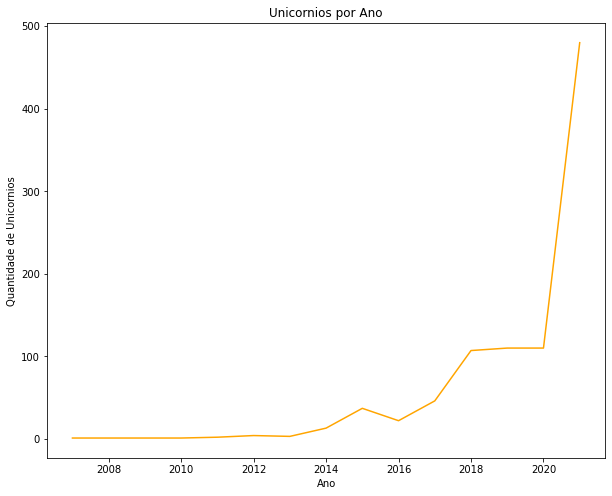

In [40]:
#plotando a quantidade por ano
plt.figure(figsize=(10,8))
plt.title('Unicornios por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Unicornios')
plt.plot(
    Analise_Ano['Ano'],
    Analise_Ano['Quantidade'],
    color = 'orange'
);

Observamos que de 2020 para 2021 temos um crescimento muito grande.

Mas será que em valor também?

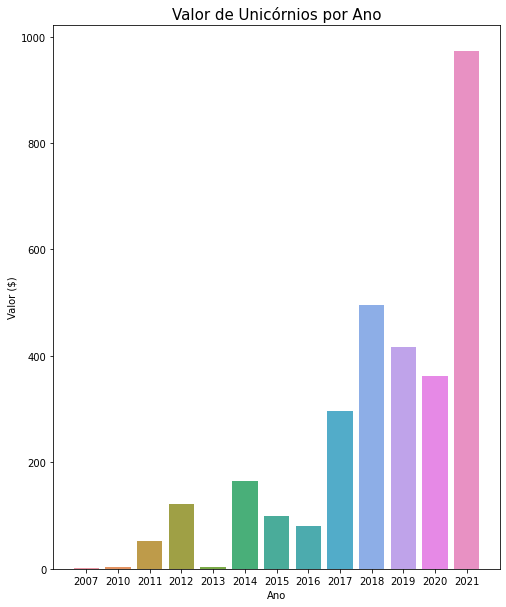

In [41]:
#plotando grafico de valores por ano
plt.figure(figsize = (8,10))

sns.barplot(
    Analise_Ano,
    x= Analise_Ano['Ano'],
    y = Analise_Ano['Valor ($)']
  )
sns.distplot().set_title(
  'Valor de Unicórnios por Ano', fontdict = { 'fontsize': 15})
plt.show()

Verificamos que em questão de valores oscila bastante em comparação com a quiantidade por ano.



# Conclusão



<b>Qual setor é o predominante?</b>
<p>R: O setor Fintech, mas o que tem mais valor seria o de Inteligência Artificial.</p>

<b>Qual ano foi predominante?</b>
<p>R: Vemos uma forte evolução ao decorrer dos anos, o ano que teve maior qauntidade e valor foi o de 2021.</p>

<b>Qual país tem mais empresas?</b>
<p>Os Estados Unidos predomina, e a dentro dele a cidade de São Francisco. </p>

<b>O Brasil é expressivo dentros dos paises que geram unicórnios?</b>
<p>Sim, está entre os Top 10 na questão de quantidade e valor e as as empresas predomina na cidade de São Paulo.</p>

